
# Project: Investigating a TMDB Movie Dataset(Data Analysis Project)

## Table of Contents

- INTRODUCTION
- DATA WRANGLING
- DATA CLEANING
- EXPLORATORY DATA ANALYSIS
- CONCLUSIONS



## Introduction

This is a data analysis project and the goal is analyze the TMDB Movies dataset which will be used to explain and go through the data analysis process. This project will mainly make use of the following python libraries: Numpy, Pandas, and Matplotlib.
This Process includes five(5) process :

1. Questions Asked
2. Data Wrangling
3. Exploratory Data Analysis
4. Conclusions
5. Communication and Presentation

The TMDB Movie Dataset was originally cleaned from the original on Kaggle and it contains information on about 10000 movies which includes the user ratings, revenue, budget and popularity which will be used to analyse the movie dataset. The dataset covers from 1966 to 2015.

QUESTIONS ASKED

- Which gernes are most popular 
- Average popularity of movies overtime
- Properties associated with movies that have the highest revenue
 


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> This part shows what the dataset looks like and what is going to be analysed

### General Properties

In [62]:
# Loading the data  
movie_data = pd.read_csv('tmdb-movies.csv')
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [63]:
#this shows the last rows of the data
movie_data.tail()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [64]:
#this shows the data type and total count of the data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [65]:
movie_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

we can seefrom the dataset that there are some columns with null values 


In [66]:
#this shows the statistical data of the tmdb dataset
movie_data.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [67]:
movie_data.shape

(10866, 21)

The tmdb dataset has 21 columns and 10866 rows


### Data Cleaning Process

1. Drop columns that are not needed for analysis: homepage, cast, imdb_id, tagline, overview, production_companies,   revenue_adj, budjet_adj.
2. Remove Duplicates
3. Change data type of release date from object to datetime
4. Drop missing values in columns with small quantity of nulls - genres, directors
5. Replacing zero values with null values in Revenue and Budget columns


 this part will involve the cleaning steps outlined above

In [181]:
# firstly i made a copy of the dataset for my analysis
tmdb = movie_data.copy()
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


After making a copy of the dataset i will start the cleaning process by dropping the columns i do not need for the analysis

In [182]:
col = ['imdb_id', 'cast', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies', 'budget_adj', 'revenue_adj']
tmdb.drop(col, axis=1, inplace= True, errors= 'ignore')
tmdb.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015



After dropping the columns not needed, i will proceed to first check for duplicates and remove the duplicates found


In [183]:
tmdb.duplicated()
sum(tmdb.duplicated())

1

In [184]:
tmdb.drop_duplicates(inplace= True)
sum(tmdb.duplicated())

0

Only one duplicate was found and removed. I will proceed to changing the data type of release date from int to datetime   

In [185]:
tmdb['release_date'].dtype

dtype('O')

In [186]:
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])
tmdb['release_date'].dtype

dtype('<M8[ns]')

In [187]:
tmdb.dropna(subset= ['genres', 'director'], inplace= True)

In [188]:
tmdb.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

We saw earlier that there are some movies recorded zero budget and revenue, this may be as a result of missing data or the data was not given by the production companies. The next cleaning process will involve replacing the zero values with null values in the budget and revenue columns so as to give accurate results when analysed.

In [189]:
tmdb.loc[tmdb['revenue'] == 0, 'revenue'] = np.nan
tmdb.loc[tmdb['budget'] == 0, 'budget'] = np.nan

In [190]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10800 non-null  int64         
 1   popularity      10800 non-null  float64       
 2   budget          5164 non-null   float64       
 3   revenue         4848 non-null   float64       
 4   original_title  10800 non-null  object        
 5   director        10800 non-null  object        
 6   runtime         10800 non-null  int64         
 7   genres          10800 non-null  object        
 8   release_date    10800 non-null  datetime64[ns]
 9   vote_count      10800 non-null  int64         
 10  vote_average    10800 non-null  float64       
 11  release_year    10800 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 1.1+ MB


Looking above we can see almost half of revenue and budget were recorded with zero values which is a lot of missing information in the movie dataset. these nan values were not droppped so as to give accurate results and insights from the dataset. i will then proceed to drop the rows with zero values in runtime column because it is a small quantity of missing data.

In [191]:
tmdb.loc[tmdb['runtime'] == 0, 'runtime'].count()

28

In [192]:
tmdb.query('runtime != 0', inplace= True)


i will check to confirm if the zero values have been dropped using the query function

In [193]:
tmdb.query('runtime == 0')

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year


As we can see there are no zero value rows in the runtime column, they have been removed.

Lastly in this cleaning process, i will be splitting the genres column and retain only the first genre in each row for my analysis.

In [194]:
tmdb['genres'] = tmdb['genres'].str.split("|").str[0]

to check the changes we use .head()

In [195]:
tmdb.head(10)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action,2015-04-01,2947,7.3,2015
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western,2015-12-25,3929,7.2,2015
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Alan Taylor,125,Science Fiction,2015-06-23,2598,5.8,2015
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,Ridley Scott,141,Drama,2015-09-30,4572,7.6,2015
8,211672,7.404165,74000000.0,1.156731e+09,Minions,Kyle Balda|Pierre Coffin,91,Family,2015-06-17,2893,6.5,2015
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,Pete Docter,94,Comedy,2015-06-09,3935,8.0,2015


we can see that only the first genre was retained in each row which will be used for analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 -  Average Popularity of movies overtime

In [196]:
tmdb.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action,2015-04-01,2947,7.3,2015


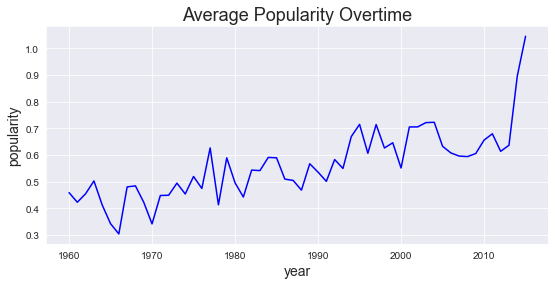

In [197]:
# Used the groupby function to group the year by average popularity
mean_p = tmdb.groupby('release_year').mean()['popularity']
plt.figure(figsize=(9, 4))
x, y = mean_p.index, mean_p
sns.set_style('darkgrid')
plt.plot(x, y, color='blue')
plt.title('Average Popularity Overtime', fontsize= 18)
plt.xlabel('year', fontsize= 14)
plt.ylabel('popularity', fontsize= 14)
plt.show()



this shows us the average popularity of movies increased overtime from 1960 to 2015

### Research Question 2 - Which gernes are most popular ?

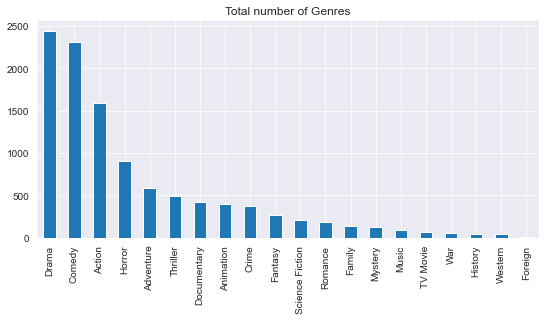

In [207]:
#using the value count function to count th values
tmdb['genres'].value_counts().plot(kind= 'bar', title= 'Total number of Genres', fontsize= 10, figsize= (9, 4));
sns.set_style('darkgrid')

this is showing the total number of movies by genres and we can see that drama had the highest number of movies followed by comedy. Moving on to analyse the popularity of these genres

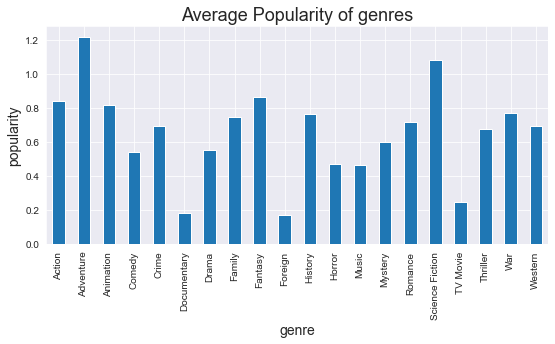

In [199]:
tmdb.groupby('genres')['popularity'].mean().plot(kind= 'bar', figsize= (9, 4))
sns.set_style('darkgrid')
plt.title('Average Popularity of genres', fontsize= 18)
plt.xlabel('genre', fontsize= 14)
plt.ylabel('popularity', fontsize= 14)
plt.show()


we can see that even when drama and comedy had the highest number of movies produced, they were still not the most popular genres. This analysis shows that adventure followed by science fiction movies were more popular than other genres.

## Research Question 3 -  Properties associated with movies that have the highest revenue?

In this question we will be looking at properties associted with movies with the highest revenue such as: popularity, runtime, and budget which will be analysed.

In [200]:
#this is showing the statistics of the revenue data
tmdb['revenue'].describe()

count    4.848000e+03
mean     8.925500e+07
std      1.620930e+08
min      2.000000e+00
25%      7.724244e+06
50%      3.187604e+07
75%      9.997431e+07
max      2.781506e+09
Name: revenue, dtype: float64

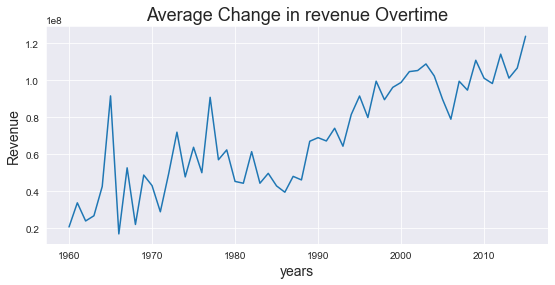

In [201]:
#showing the trend of revenue over the years
rev = tmdb.groupby('release_year')['revenue'].mean()

plt.figure(figsize=(9, 4))
rev.plot()
plt.title('Average Change in revenue Overtime', fontsize= 18);
plt.xlabel('years', fontsize= 14)
plt.ylabel('Revenue', fontsize= 14)
plt.show()


we can see above the average change in revenue overtime which shows that there is an average increase in revenue of movies overtime.

## Popularity and Revenue
this will show how popularity is associated with revenue in terms of the the relationship between the two

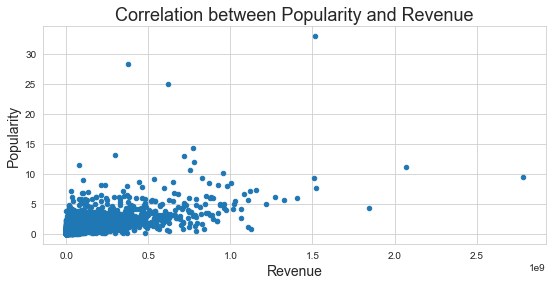

In [203]:
# i will define a function to wrap my code for reuse in other analysis
def plot_scatter(x, y, title, xlabel, ylabel):
    sns.set_style('whitegrid')
    tmdb.plot.scatter(x, y, figsize= (9, 4))
    plt.title(title, fontsize= 18)
    plt.xlabel(xlabel, fontsize= 14)
    plt.ylabel(ylabel, fontsize= 14)


plot_scatter("revenue", "popularity", "Correlation between Popularity and Revenue", "Revenue", "Popularity")



this shows that there is a positive correlation between popularity and revenue, the popular a movie is, the higher the revenue of thre movie

## Budget and Revenue

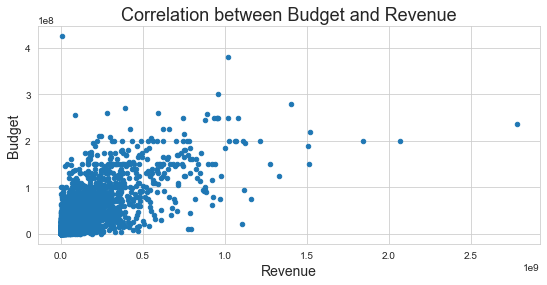

In [204]:
# recalling my defined function from the previous cell
plot_scatter("revenue", "budget", "Correlation between Budget and Revenue", "Revenue", "Budget")

this shows that there is a positive correlation between budget and revenue, the higher the budget for a movie is, the higher the revenue of the movie

## Runtime and Revenue

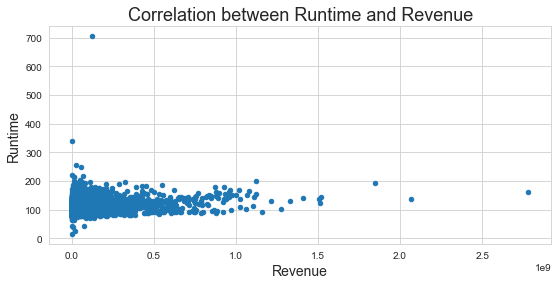

In [205]:
plot_scatter("revenue", "runtime", "Correlation between Runtime and Revenue", "Revenue", "Runtime")

this shows that there is no correlation between runtime and revenue, a longer or shorter duration does not imply a higher revenue of the movie

<a id='conclusions'></a>
## Conclusions

Part one: Average Popularity of movies overtime

At part one, I analysed trend popularity of movies overtime. it was concluded that movies started becoming popular in the later years of 2010 to 2015. the average popularity of movies increased over the years.

Part two:  Which gernes are most popular
this part revealed that drama had the highest number of movies and aslo analysing the popularity of movies by genres, adventure was the most popular followed by science fiction movies.

Part three:  Properties associated with movies that have the highest revenue
after analysing the revenue data, it was revealed that the average revenue increased overtime.
-Movies with higher popularity have shown a corresponding increase in the revenues.
-Movies with higher budgets have shown a corresponding increase in the revenues.
-it also shows that runtime has no correlation with increase in revenue

### Limitation
The limitation of this research is that there are so many data that have been cleaned in this report. These datas are seen as anomalies since they contains NaN in some of the columns. The amount of missing data was large which may lead to inaccuracies

## References
- Stack overflow
- panada
- medium blog